In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Code to Print Class Mapping:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setup ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/train',  # your train folder path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Print class indices (mapping)
print("Class Mapping (Class Name -> Class Index):")
print(train_generator.class_indices)

# Optional: reverse mapping if you want index -> class name
reverse_mapping = {v: k for k, v in train_generator.class_indices.items()}
print("\nReverse Mapping (Class Index -> Class Name):")
print(reverse_mapping)


Found 2949 images belonging to 5 classes.
Class Mapping (Class Name -> Class Index):
{'Mild': 0, 'Moderate': 1, 'No_DR': 2, 'Proliferate_DR': 3, 'Severe': 4}

Reverse Mapping (Class Index -> Class Name):
{0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3: 'Proliferate_DR', 4: 'Severe'}


# New Section



---
FEATURE EXTRACTION!


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog
from tqdm import tqdm

def extract_hog_features_from_folder(dataset_path):
    features = []
    labels = []
    class_labels = sorted(os.listdir(dataset_path))
    class_mapping = {label: idx for idx, label in enumerate(class_labels)}

    for label in class_labels:
        class_path = os.path.join(dataset_path, label)
        if not os.path.isdir(class_path):
            continue
        for img_name in tqdm(os.listdir(class_path), desc=f"Processing {label}"):
            img_path = os.path.join(class_path, img_name)

            # Read image
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue  # Skip if image is not readable

            # Resize (optional, but good for consistency)
            img = cv2.resize(img, (128, 128))  # Resize to 128x128

            # Extract HOG features
            hog_features = hog(img, orientations=9, pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)

            features.append(hog_features)
            labels.append(class_mapping[label])

    return np.array(features), np.array(labels), class_mapping

# ------------------ EXTRACT FOR TRAIN ------------------
train_path ="/content/drive/MyDrive/train"
X_train, y_train, class_mapping = extract_hog_features_from_folder(train_path)

# Save train features
train_df = pd.DataFrame(X_train)
train_df['Label'] = y_train
train_df.to_csv('/content/drive/MyDrive/train_features.csv', index=False)
print("Train features saved successfully!")

# ------------------ EXTRACT FOR TEST ------------------
test_path = "/content/drive/MyDrive/test"
X_test, y_test, _ = extract_hog_features_from_folder(test_path)

# Save test features
test_df = pd.DataFrame(X_test)
test_df['Label'] = y_test
test_df.to_csv('/content/drive/MyDrive/test_features.csv', index=False)
print("Test features saved successfully!")

# ------------------ OPTIONAL: SHOW class_mapping ------------------
print("\nClass Mapping (folder names to labels):")
for class_name, label_idx in class_mapping.items():
    print(f"{label_idx} --> {class_name}")


Processing Severe: 100%|██████████| 154/154 [00:04<00:00, 35.77it/s]


Train features saved successfully!


Processing Severe: 100%|██████████| 59/59 [00:44<00:00,  1.33it/s]


Test features saved successfully!

Class Mapping (folder names to labels):
0 --> .DS_Store
1 --> Mild
2 --> Moderate
3 --> No_DR
4 --> Proliferate_DR
5 --> Severe


In [ ]:
random=pd.read_csv('/content/drive/MyDrive/test_features.csv')
random

,0,1,2,3,4,5,6,7,8,9,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,Label
0,0.100594,0.000000,0.033473,0.000000,0.124264,0.000000,0.058578,0.026463,0.000000,0.118346,...,0.062064,0.000000,0.015959,0.006308,0.039495,0.006308,0.035907,0.006308,0.000000,1
1,0.388457,0.000000,0.000000,0.000000,0.388457,0.000000,0.000000,0.000000,0.000000,0.388457,...,0.038948,0.000000,0.011016,0.005806,0.038948,0.000000,0.011016,0.000000,0.000000,1
2,0.291260,0.000000,0.167015,0.000000,0.291260,0.066018,0.250522,0.066018,0.000000,0.291260,...,0.345812,0.000000,0.000000,0.000000,0.293666,0.000000,0.000000,0.000000,0.000000,1
3,0.500102,0.000000,0.070918,0.000000,0.200587,0.000000,0.035459,0.000000,0.000000,0.175514,...,0.103873,0.000000,0.066104,0.011613,0.093486,0.000000,0.022035,0.000000,0.000000,1
4,0.301268,0.000000,0.000000,0.000000,0.301268,0.000000,0.071010,0.000000,0.000000,0.323542,...,0.361158,0.000000,0.000000,0.000000,0.361158,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0.344302,0.344302,0.344302,0.000000,0.009735,0.000000,0.000000,0.003628,0.077948,0.344302,...,0.374298,0.374298,0.374298,0.044236,0.050404,0.000000,0.041930,0.015967,0.072186,5
756,0.286475,0.000000,0.190280,0.000000,0.286475,0.150429,0.095140,0.150429,0.000000,0.286475,...,0.256697,0.134369,0.113310,0.108132,0.240367,0.000000,0.254947,0.089579,0.000000,5
757,0.278413,0.081202,0.119832,0.027067,0.157364,0.000000,0.085595,0.000000,0.000000,0.229993,...,0.144757,0.000000,0.084402,0.013975,0.093745,0.027949,0.070707,0.013975,0.000000,5
758,0.351232,0.000000,0.098096,0.000000,0.351232,0.000000,0.098096,0.000000,0.000000,0.346821,...,0.050300,0.000000,0.018720,0.000000,0.034416,0.000000,0.018720,0.000000,0.000000,5


1 --> Mild
2 --> Moderate
3 --> No_DR
4 --> Proliferate_DR
5 --> Severe
Remeber the Mapping as been changed!



---
SVM




---
\

SVM


--- Validation Set Results ---
Accuracy: 0.747457627118644
Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.34      0.42        59
           2       0.58      0.83      0.68       162
           3       0.90      0.98      0.93       291
           4       1.00      0.02      0.04        47
           5       0.40      0.06      0.11        31

    accuracy                           0.75       590
   macro avg       0.68      0.45      0.44       590
weighted avg       0.76      0.75      0.70       590



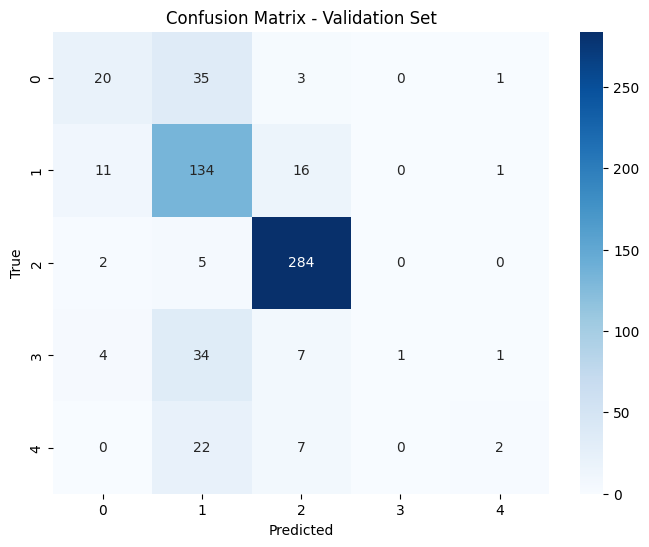


--- Test Set Results ---
Accuracy: 0.7039473684210527
Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.28      0.39        74
           2       0.52      0.74      0.61       200
           3       0.84      0.98      0.91       368
           4       0.00      0.00      0.00        59
           5       0.50      0.07      0.12        59

    accuracy                           0.70       760
   macro avg       0.49      0.42      0.40       760
weighted avg       0.64      0.70      0.65       760



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


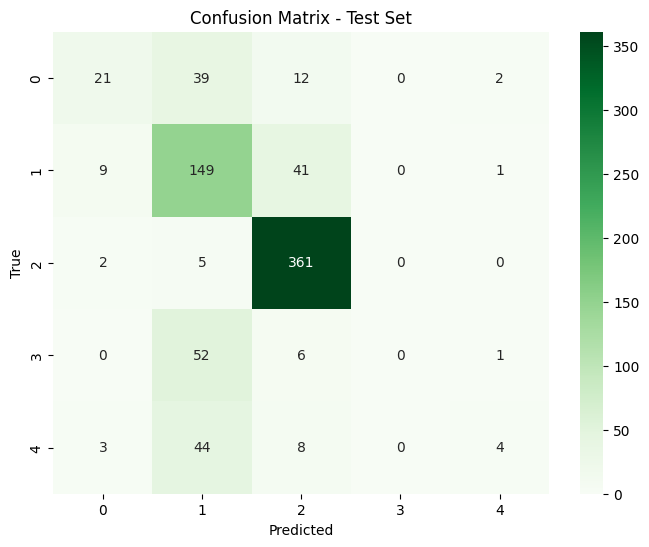


 Model saved successfully as both .pkl and .joblib files!


In [ ]:
#SVMMMṀ
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import joblib

# Load extracted features from CSV files
train_df = pd.read_csv('/content/drive/MyDrive/train_features.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test_features.csv')

# Split features and labels
X_train_full = train_df.iloc[:, :-1].values  # All columns except last (features)
y_train_full = train_df.iloc[:, -1].values   # Last column (labels)

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Split training set into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

# Initialize SVM model (default hyperparameters)
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = svm_model.predict(X_val)

# Predict on test set
y_test_pred = svm_model.predict(X_test)

# Evaluation on Validation Set
print("\n--- Validation Set Results ---")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Confusion Matrix for Validation
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Evaluation on Test Set
print("\n--- Test Set Results ---")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix for Test
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Save model using Pickle
with open('/content/drive/MyDrive/Models/svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

# Save model using Joblib
joblib.dump(svm_model, '/content/drive/MyDrive/Models/svm_model.joblib')

print("\n Model saved successfully as both .pkl and .joblib files!")


---

KNN
K=5 neighbors chosen (default), but you can tune it later easily using Validation set.

Validation split ensures proper separation.

Both model saving methods included.
later tune KNN hyperparameters (k, weights, metric)


--- Validation Set Results ---
Accuracy: 0.7084745762711865
Classification Report:
               precision    recall  f1-score   support

           1       0.36      0.51      0.42        59
           2       0.58      0.64      0.60       162
           3       0.92      0.96      0.94       291
           4       0.14      0.04      0.07        47
           5       0.44      0.13      0.20        31

    accuracy                           0.71       590
   macro avg       0.49      0.45      0.45       590
weighted avg       0.68      0.71      0.69       590



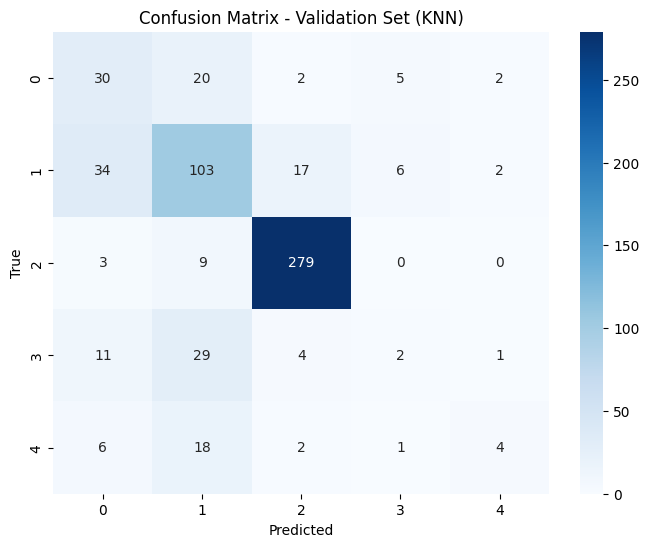


--- Test Set Results ---
Accuracy: 0.6763157894736842
Classification Report:
               precision    recall  f1-score   support

           1       0.31      0.45      0.37        74
           2       0.56      0.60      0.58       200
           3       0.87      0.95      0.91       368
           4       0.29      0.15      0.20        59
           5       0.33      0.07      0.11        59

    accuracy                           0.68       760
   macro avg       0.47      0.44      0.43       760
weighted avg       0.65      0.68      0.65       760



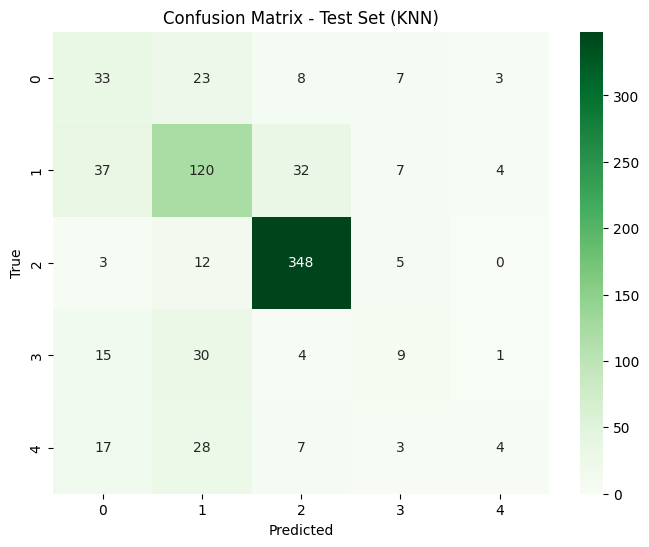


 KNN Model saved successfully as both .pkl and .joblib files!


In [ ]:
#KNN.     # Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import joblib

# Load extracted features from CSV files
train_df = pd.read_csv('/content/drive/MyDrive/train_features.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test_features.csv')

# Split features and labels
X_train_full = train_df.iloc[:, :-1].values  # All columns except last (features)
y_train_full = train_df.iloc[:, -1].values   # Last column (labels)

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Split training set into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

# Initialize KNN model (default hyperparameters)
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default k=5

# Train the model
knn_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = knn_model.predict(X_val)

# Predict on test set
y_test_pred = knn_model.predict(X_test)

# Evaluation on Validation Set
print("\n--- Validation Set Results ---")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Confusion Matrix for Validation
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Validation Set (KNN)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Evaluation on Test Set
print("\n--- Test Set Results ---")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix for Test
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test Set (KNN)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Save model using Pickle
with open('/content/drive/MyDrive/Models/knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

# Save model using Joblib
joblib.dump(knn_model, '/content/drive/MyDrive/Models/knn_model.joblib')

print("\n KNN Model saved successfully as both .pkl and .joblib files!")




---
RANDOM FOREST CLASSIFIER!



Validation Accuracy: 0.7406779661016949

Validation Classification Report:
               precision    recall  f1-score   support

           1       0.43      0.39      0.41        59
           2       0.58      0.78      0.67       162
           3       0.92      0.97      0.94       291
           4       0.50      0.04      0.08        47
           5       0.38      0.10      0.15        31

    accuracy                           0.74       590
   macro avg       0.56      0.46      0.45       590
weighted avg       0.72      0.74      0.70       590


Test Accuracy: 0.7078947368421052

Test Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.35      0.43        74
           2       0.53      0.74      0.62       200
           3       0.85      0.96      0.91       368
           4       0.71      0.08      0.15        59
           5       0.44      0.07      0.12        59

    accuracy                           0.71

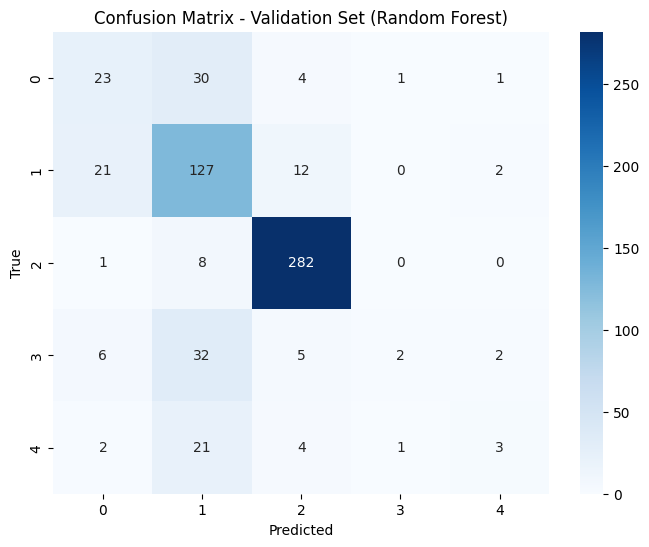

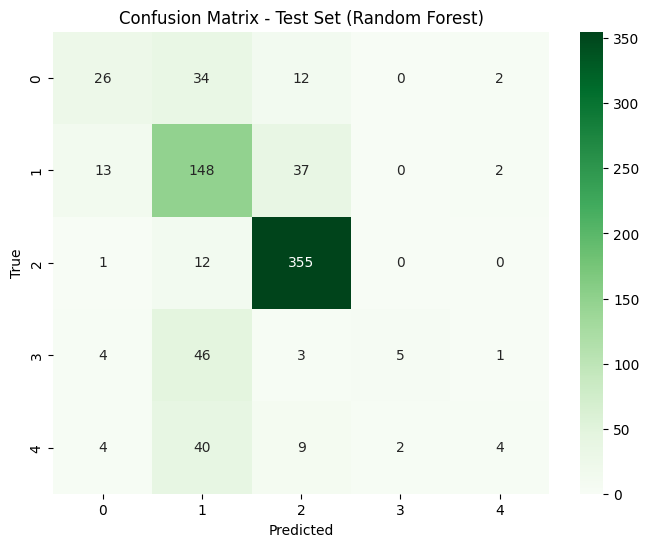


 Random Forest model saved successfully in both .joblib and .pkl formats!


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load extracted features from CSV
train_df = pd.read_csv("/content/drive/MyDrive/train_features.csv")  # Adjust path
test_df = pd.read_csv("/content/drive/MyDrive/test_features.csv")

# Split features and labels
X_train_full = train_df.iloc[:, :-1].values  # Features (all columns except last)
y_train_full = train_df.iloc[:, -1].values   # Labels (last column)

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Split training data into actual train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # Let trees grow fully (tune later if needed)
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on Validation set
val_preds = rf_model.predict(X_val)

# Predict on Test set
test_preds = rf_model.predict(X_test)

# Evaluate validation performance
print("\nValidation Accuracy:", accuracy_score(y_val, val_preds))
print("\nValidation Classification Report:\n", classification_report(y_val, val_preds))

# Evaluate test performance
print("\nTest Accuracy:", accuracy_score(y_test, test_preds))
print("\nTest Classification Report:\n", classification_report(y_test, test_preds))

# Confusion Matrix for Validation Set
conf_val = confusion_matrix(y_val, val_preds)
plt.figure(figsize=(8,6))
sns.heatmap(conf_val, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Validation Set (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix for Test Set
conf_test = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(conf_test, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test Set (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Save model using joblib
joblib.dump(rf_model, "/content/drive/MyDrive/Models/random_forest_model.joblib")

# Save model using pickle
with open("/content/drive/MyDrive/Models/random_forest_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("\n Random Forest model saved successfully in both .joblib and .pkl formats!")


DECISION TREE


Validation Accuracy: 0.6457627118644068

Validation Classification Report:
               precision    recall  f1-score   support

           1       0.37      0.44      0.40        59
           2       0.56      0.55      0.55       162
           3       0.91      0.86      0.88       291
           4       0.19      0.19      0.19        47
           5       0.19      0.23      0.21        31

    accuracy                           0.65       590
   macro avg       0.44      0.45      0.45       590
weighted avg       0.66      0.65      0.65       590


Test Accuracy: 0.6276315789473684

Test Classification Report:
               precision    recall  f1-score   support

           1       0.32      0.32      0.32        74
           2       0.55      0.55      0.55       200
           3       0.84      0.87      0.85       368
           4       0.26      0.31      0.28        59
           5       0.20      0.12      0.15        59

    accuracy                           0.63

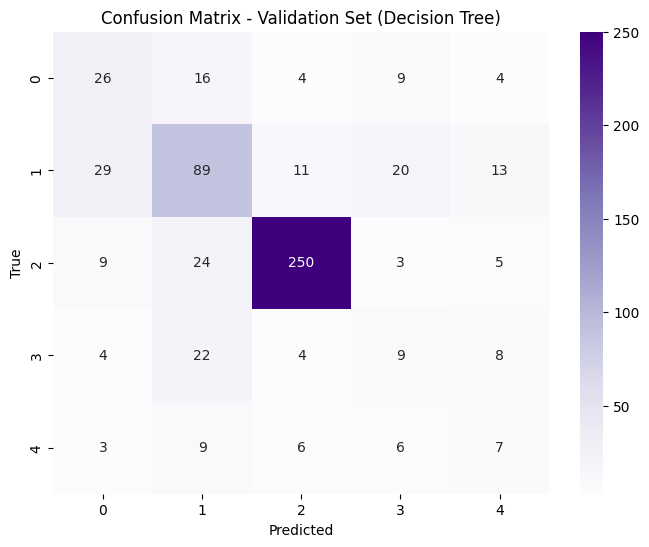

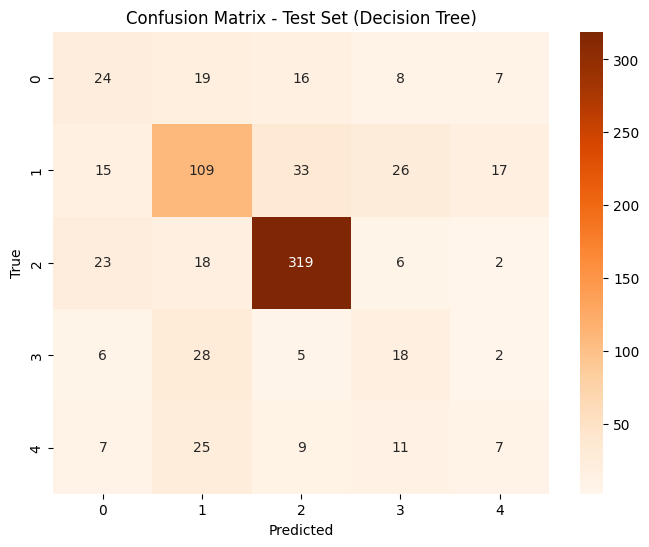


 Decision Tree model saved successfully in both .joblib and .pkl formats!


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load extracted features from CSV
train_df = pd.read_csv("/content/drive/MyDrive/train_features.csv")
test_df = pd.read_csv("/content/drive/MyDrive/test_features.csv")

# Split features and labels
X_train_full = train_df.iloc[:, :-1].values  # Features (all columns except last)
y_train_full = train_df.iloc[:, -1].values   # Labels (last column)

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Split training data into actual train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    random_state=42
)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on Validation set
val_preds = dt_model.predict(X_val)

# Predict on Test set
test_preds = dt_model.predict(X_test)

# Evaluate validation performance
print("\nValidation Accuracy:", accuracy_score(y_val, val_preds))
print("\nValidation Classification Report:\n", classification_report(y_val, val_preds))

# Evaluate test performance
print("\nTest Accuracy:", accuracy_score(y_test, test_preds))
print("\nTest Classification Report:\n", classification_report(y_test, test_preds))

# Confusion Matrix for Validation Set
conf_val = confusion_matrix(y_val, val_preds)
plt.figure(figsize=(8,6))
sns.heatmap(conf_val, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Validation Set (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix for Test Set
conf_test = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(conf_test, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Test Set (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Save model using joblib
joblib.dump(dt_model, "/content/drive/MyDrive/Models/decision_tree_model.joblib")

# Save model using pickle
with open("/content/drive/MyDrive/Models/decision_tree_model.pkl", "wb") as file:
    pickle.dump(dt_model, file)

print("\n Decision Tree model saved successfully in both .joblib and .pkl formats!")


In [ ]:
# Save model using joblib
joblib.dump(dt_model, "/content/drive/MyDrive/Models/decision_tree_model.joblib")

# Save model using pickle
with open("/content/drive/MyDrive/Models/decision_tree_model.pkl", "wb") as file:
    pickle.dump(dt_model, file)

---
LOGISTIC REGRESSION!\




Validation Accuracy: 0.7440677966101695

Validation Classification Report:
               precision    recall  f1-score   support

           1       0.53      0.56      0.55        59
           2       0.63      0.73      0.68       162
           3       0.93      0.96      0.94       291
           4       0.24      0.11      0.15        47
           5       0.21      0.13      0.16        31

    accuracy                           0.74       590
   macro avg       0.51      0.50      0.49       590
weighted avg       0.71      0.74      0.73       590


Test Accuracy: 0.6986842105263158

Test Classification Report:
               precision    recall  f1-score   support

           1       0.51      0.47      0.49        74
           2       0.57      0.64      0.60       200
           3       0.88      0.94      0.91       368
           4       0.35      0.32      0.34        59
           5       0.21      0.07      0.10        59

    accuracy                           0.70

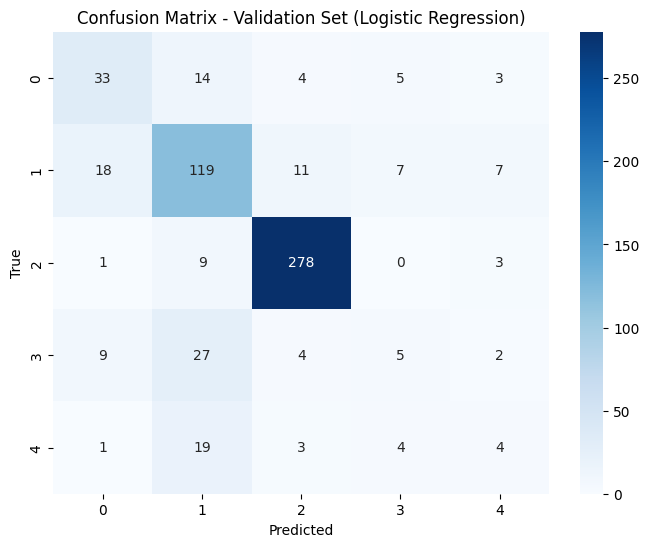

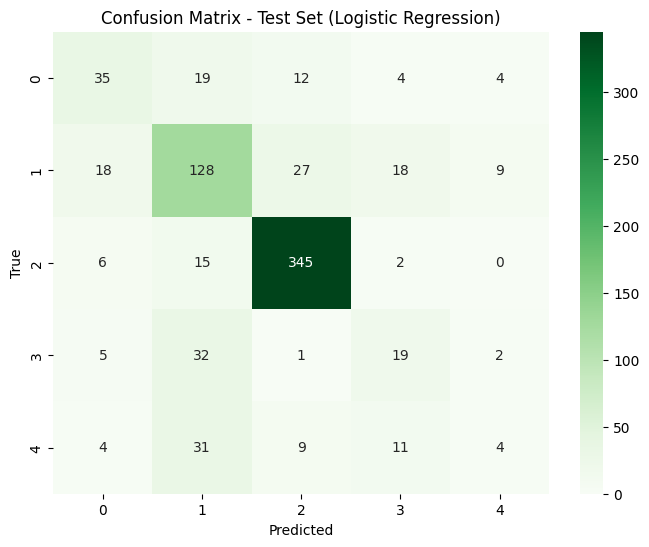


 Logistic Regression model saved successfully in both .joblib and .pkl formats!


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load extracted features from CSV
train_df = pd.read_csv("/content/drive/MyDrive/train_features.csv")
test_df = pd.read_csv("/content/drive/MyDrive/test_features.csv")

# Split features and labels
X_train_full = train_df.iloc[:, :-1].values  # Features (all columns except last)
y_train_full = train_df.iloc[:, -1].values   # Labels (last column)

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Split training data into actual train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

# Initialize Logistic Regression Classifier
logreg_model = LogisticRegression(
    max_iter=1000,   # Important to set higher for convergence
    random_state=42
)

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on Validation set
val_preds = logreg_model.predict(X_val)

# Predict on Test set
test_preds = logreg_model.predict(X_test)

# Evaluate validation performance
print("\nValidation Accuracy:", accuracy_score(y_val, val_preds))
print("\nValidation Classification Report:\n", classification_report(y_val, val_preds))

# Evaluate test performance
print("\nTest Accuracy:", accuracy_score(y_test, test_preds))
print("\nTest Classification Report:\n", classification_report(y_test, test_preds))

# Confusion Matrix for Validation Set
conf_val = confusion_matrix(y_val, val_preds)
plt.figure(figsize=(8,6))
sns.heatmap(conf_val, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Validation Set (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix for Test Set
conf_test = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(conf_test, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test Set (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Save model using joblib
joblib.dump(logreg_model, "/content/drive/MyDrive/Models/logistic_regression_model.joblib")

# Save model using pickle
with open("/content/drive/MyDrive/Models/logistic_regression_model.pkl", "wb") as file:
    pickle.dump(logreg_model, file)

print("\n Logistic Regression model saved successfully in both .joblib and .pkl formats!")


In [ ]:
# Save model using joblib
joblib.dump(logreg_model, "/content/drive/MyDrive/Models/logistic_regression_model.joblib")

# Save model using pickle
with open("/content/drive/MyDrive/Models/logistic_regression_model.pkl", "wb") as file:
    pickle.dump(logreg_model, file)

\

---
Gaussian Naive Bayes



Validation Accuracy: 0.6322033898305085

Validation Classification Report:
               precision    recall  f1-score   support

           1       0.36      0.81      0.49        59
           2       0.77      0.42      0.54       162
           3       0.98      0.81      0.89       291
           4       0.34      0.23      0.28        47
           5       0.11      0.35      0.17        31

    accuracy                           0.63       590
   macro avg       0.51      0.53      0.48       590
weighted avg       0.77      0.63      0.67       590


Test Accuracy: 0.5736842105263158

Test Classification Report:
               precision    recall  f1-score   support

           1       0.30      0.64      0.41        74
           2       0.63      0.30      0.41       200
           3       0.94      0.79      0.86       368
           4       0.31      0.31      0.31        59
           5       0.14      0.32      0.19        59

    accuracy                           0.57

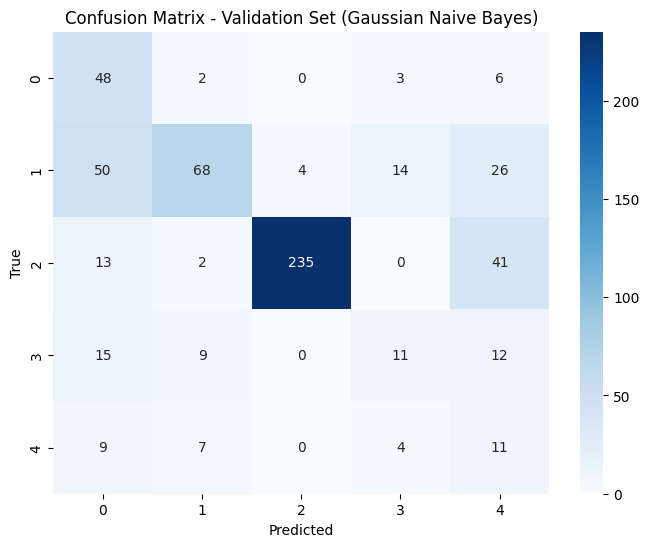

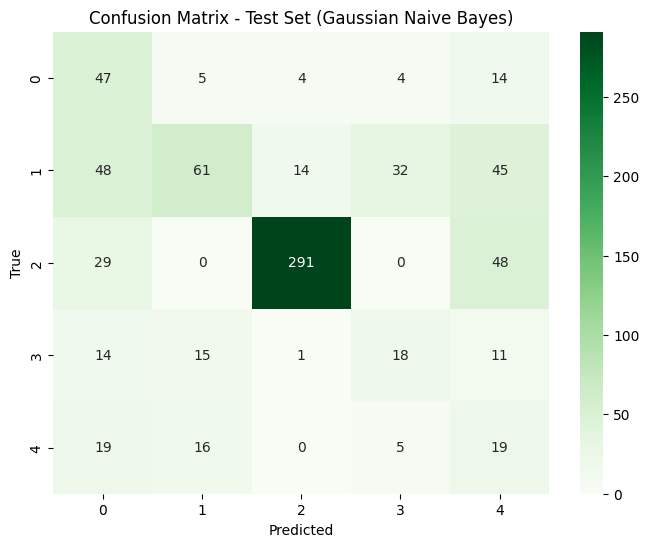


 Gaussian Naive Bayes model saved successfully in both .joblib and .pkl formats!


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load extracted features from CSV
train_df = pd.read_csv("/content/drive/MyDrive/train_features.csv")
test_df = pd.read_csv("/content/drive/MyDrive/test_features.csv")

# Split features and labels
X_train_full = train_df.iloc[:, :-1].values  # All columns except last (features)
y_train_full = train_df.iloc[:, -1].values   # Last column (labels)

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Create Validation Split
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.2,
    stratify=y_train_full,
    random_state=42
)

# Initialize Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train, y_train)

# Predictions
val_preds = gnb_model.predict(X_val)
test_preds = gnb_model.predict(X_test)

# Validation Performance
print("\nValidation Accuracy:", accuracy_score(y_val, val_preds))
print("\nValidation Classification Report:\n", classification_report(y_val, val_preds))

# Test Performance
print("\nTest Accuracy:", accuracy_score(y_test, test_preds))
print("\nTest Classification Report:\n", classification_report(y_test, test_preds))

# Confusion Matrix for Validation Set
conf_val = confusion_matrix(y_val, val_preds)
plt.figure(figsize=(8,6))
sns.heatmap(conf_val, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Validation Set (Gaussian Naive Bayes)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix for Test Set
conf_test = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(conf_test, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Test Set (Gaussian Naive Bayes)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Save model using joblib
joblib.dump(gnb_model, "/content/drive/MyDrive/Models/gaussian_nb_model.joblib")

# Save model using pickle
with open("/content/drive/MyDrive/Models/gaussian_nb_model.pkl", "wb") as file:
    pickle.dump(gnb_model, file)

print("\n Gaussian Naive Bayes model saved successfully in both .joblib and .pkl formats!")


---
\

---

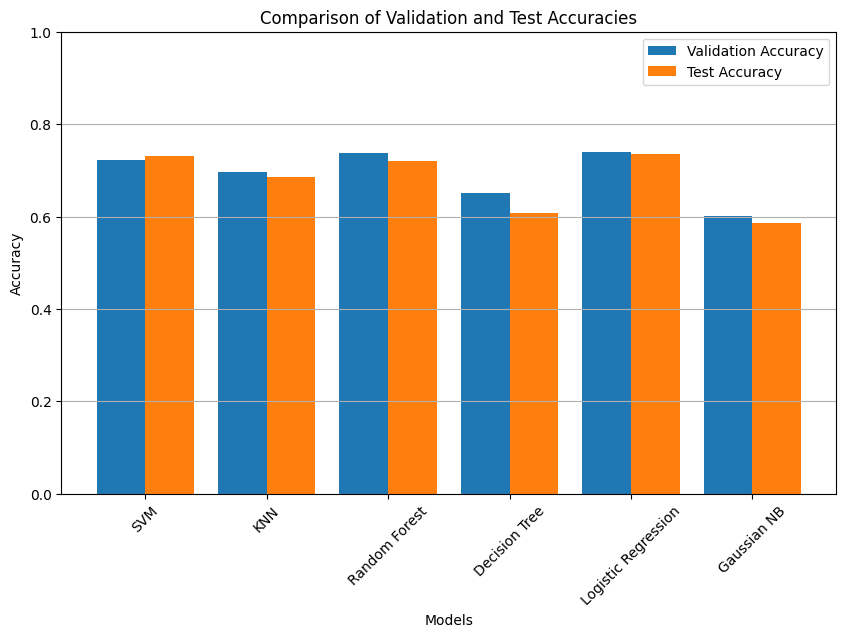

In [ ]:
#PLOTTING........

import matplotlib.pyplot as plt

# Example accuracies (replace these with your actual results)
model_names = ["SVM", "KNN", "Random Forest", "Decision Tree", "Logistic Regression", "Gaussian NB"]

# Validation Accuracies
val_accuracies = [0.721399730820996, 0.6966101694915254, 0.7372881355932204, 0.6508474576271186,  0.7389830508474576,  0.6016949152542372]  # <-- replace these

# Test Accuracies
test_accuracies = [0.731399730820996, 0.6850605652759085, 0.7200538358008075, 0.6069986541049798, 0.7348586810228802, 0.585464333781965]  # <-- replace these

# Plot
x = range(len(model_names))
plt.figure(figsize=(10,6))
plt.bar(x, val_accuracies, width=0.4, label='Validation Accuracy', align='center')
plt.bar([i + 0.4 for i in x], test_accuracies, width=0.4, label='Test Accuracy', align='center')
plt.xticks([i + 0.2 for i in x], model_names, rotation=45)
plt.ylim(0, 1)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Validation and Test Accuracies")
plt.legend()
plt.grid(axis='y')
plt.show()


In [ ]:
##CNN


In [ ]:
import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Set paths
train_dir = "/content/drive/MyDrive/train"
test_dir = "/content/drive/MyDrive/test"

# Image settings
img_height, img_width = 224, 224
batch_size = 32
num_classes = 5

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    shuffle=False,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate on validation set
val_preds = model.predict(val_generator)
val_preds_labels = np.argmax(val_preds, axis=1)
val_true_labels = val_generator.classes
print("Validation Report:\n", classification_report(val_true_labels, val_preds_labels))
print("Validation Confusion Matrix:\n", confusion_matrix(val_true_labels, val_preds_labels))

# Evaluate on test set
test_preds = model.predict(test_generator)
test_preds_labels = np.argmax(test_preds, axis=1)
test_true_labels = test_generator.classes
print("Test Report:\n", classification_report(test_true_labels, test_preds_labels))
print("Test Confusion Matrix:\n", confusion_matrix(test_true_labels, test_preds_labels))



Found 2657 images belonging to 5 classes.
Found 292 images belonging to 5 classes.
Found 760 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1191s 14s/step - accuracy: 0.5770 - loss: 1.4093 - val_accuracy: 0.7226 - val_loss: 0.7154
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 186ms/step - accuracy: 0.7018 - loss: 0.8030 - val_accuracy: 0.7295 - val_loss: 0.7328
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 187ms/step - accuracy: 0.7262 - loss: 0.7972 - val_accuracy: 0.7260 - val_loss: 0.6879
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 178ms/step - accuracy: 0.7303 - loss: 0.7743 - val_accuracy: 0.7397 - val_loss: 0.6881
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 187ms/step - accuracy: 0.7377 - loss: 0.7304 - val_accuracy: 0.7397 - val_loss: 0.7051
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.7435 - loss: 0.7388 - val_accuracy: 0.7363 - val_loss: 0.6721
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - accuracy: 0.7301 - loss: 0.7299 - val_accuracy: 0.7363 - val_loss: 0.6900
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - accuracy: 0.7490 - loss: 0.6878 - val_accu

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 317s 14s/step
Test Report:
               precision    recall  f1-score   support

           0       0.53      0.28      0.37        74
           1       0.52      0.81      0.63       200
           2       0.90      0.96      0.93       368
           3       0.00      0.00      0.00        59
           4       0.40      0.07      0.12        59

    accuracy                           0.71       760
   macro avg       0.47      0.43      0.41       760
weighted avg       0.65      0.71      0.66       760

Test Confusion Matrix:
 [[ 21  44   6   0   3]
 [ 11 163  25   0   1]
 [  1  13 354   0   0]
 [  4  51   2   0   2]
 [  3  44   8   0   4]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


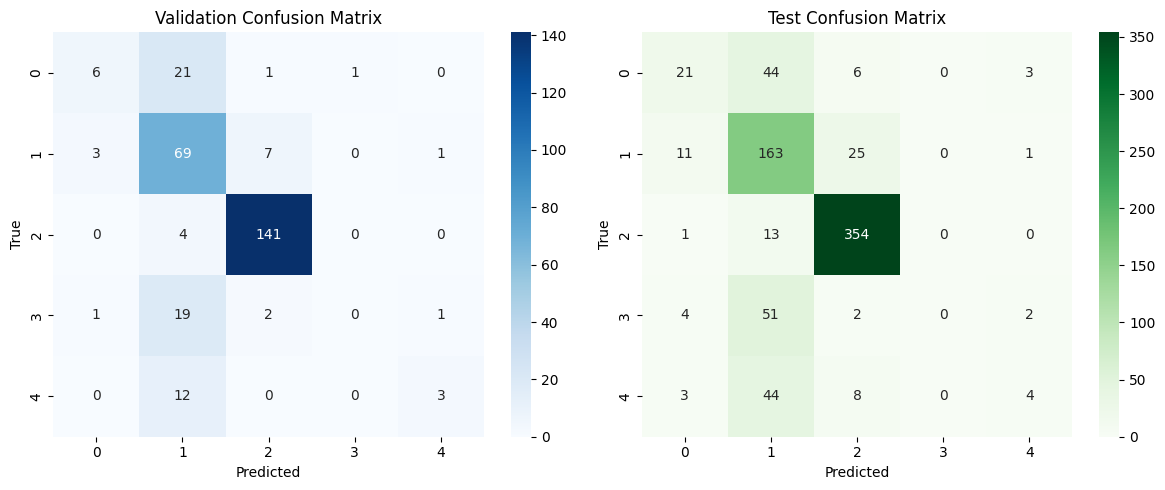

In [ ]:
# === Confusion Matrices ===
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(val_true_labels, val_preds_labels), annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(test_true_labels, test_preds_labels), annot=True, fmt='d', cmap='Greens')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

#model saving!!
model.save('/content/drive/MyDrive/Models/cnn_model_main_test_train_val (1).h5')

In [ ]:

###
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,508,817 (127.83 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,339,212 (85.22 MB)

In [ ]:
! pip install gradio



---
FRONTEND!!



In [ ]:
import gradio as gr
import numpy as np
import joblib
import pickle
import cv2
from skimage.feature import hog
import xgboost as xgb

# Mapping of class predictions to labels
class_labels = {
    1: "Mild",
    2: "Moderate",
    3: "No_DR",
    4: "Proliferative_DR",
    5: "Severe"
}

# Function to extract HOG features from an image
def extract_hog_features(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    fd, _ = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return fd

# Function to preprocess the image
def preprocess_image(image):
    # Resize image
    image = cv2.resize(image, (128, 128))
    # Extract features (HOG)
    return extract_hog_features(image)

# Function to load models
def load_models():
    # Load the saved models
    svm_model = joblib.load('/content/drive/MyDrive/Models/svm_model.pkl')
    rf_model = joblib.load('/content/drive/MyDrive/Models/random_forest_model.pkl')
    lr_model = joblib.load('/content/drive/MyDrive/Models/logistic_regression_model.pkl')
    dt_model = joblib.load('/content/drive/MyDrive/Models/decision_tree_model.pkl')
    nb_model = joblib.load('/content/drive/MyDrive/Models/gaussian_nb_model.pkl')
    knn_model = joblib.load('/content/drive/MyDrive/Models/knn_model.pkl')
    return svm_model, rf_model, lr_model, dt_model, nb_model, knn_model

# Function to make prediction
def predict_image(image, model_choice):
    # Preprocess the image and extract features
    features = preprocess_image(image)

    # Load models
    svm_model, rf_model, lr_model, dt_model, nb_model, knn_model = load_models()

    # Choose the model based on user input
    if model_choice == "SVM":
        prediction = svm_model.predict([features])
    elif model_choice == "Random Forest":
        prediction = rf_model.predict([features])
    elif model_choice == "Logistic Regression":
        prediction = lr_model.predict([features])
    elif model_choice == "Decision Tree":
        prediction = dt_model.predict([features])
    elif model_choice == "Naive Bayes":
        prediction = nb_model.predict([features])
    elif model_choice == "KNN":
        prediction = knn_model.predict([features])
    else:
        return "Model not implemented"

    # Map the prediction to the class label
    predicted_class = class_labels.get(prediction[0], "Unknown Class")
    return f"Predicted Class: {predicted_class}"

# Gradio Interface
iface = gr.Interface(
    fn=predict_image,
    inputs=[
        gr.Image(type="numpy", label="Upload Image"),
        gr.Dropdown(["SVM", "Random Forest", "Logistic Regression", "Decision Tree", "Naive Bayes", "KNN"], label="Select Model")
    ],
    outputs=gr.Textbox(label="Predicted Class"),
    live=True
)

iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a5e35282d111f8c96e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# CNNNNNN FRONTEND

import gradio as gr
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# --- Load CNN Model ---
cnn_model = load_model('/content/drive/MyDrive/Models/cnn_model_main_test_train_val (1).h5')

# --- Class Mapping for CNN ---
cnn_class_labels = {
    0: "No_DR",
    1: "Mild",
    2: "Moderate",
    3: "Severe",
    4: "Proliferative_DR"
}

# --- Prediction Function using CNN ---
def predict_with_cnn_model(image, model_choice):
    if model_choice == "CNN":
        img = cv2.resize(image, (224, 224)) / 255.0
        img = np.expand_dims(img, axis=0)
        pred = cnn_model.predict(img)
        pred_class = np.argmax(pred)
        return f"Predicted Class (CNN): {cnn_class_labels.get(pred_class, 'Unknown')}"
    else:
        return "Model not supported"

# --- Gradio Interface ---
iface = gr.Interface(
    fn=predict_with_cnn_model,
    inputs=[
        gr.Image(type="numpy", label="Upload Image"),
        gr.Dropdown(["CNN"], label="Select Model")
    ],
    outputs=gr.Textbox(label="Predicted Class")
)

iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://33d416724bd6ae8a00.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
